(test-functions:wing-weight)=
# Wing Weight Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

The Wing Weight test function {cite}`Forrester2008` is a 10-dimensional
scalar-valued function.
The function has been used as a test function in the context of metamodeling
{cite}`Zuhal2020` and optimization {cite}`Forrester2008`.

## Test function instance

To create a default instance of the wing weight test function:

In [2]:
my_testfun = uqtf.WingWeight()

Check if it has been correctly instantiated:

In [3]:
print(my_testfun)

Name              : WingWeight
Spatial dimension : 10
Description       : Wing weight model from Forrester et al. (2008)


## Description

The weight of a light aircraft wing is computed using
the following analytical expression:

$$
\mathcal{M}(\boldsymbol{x}) = 0.036 \, S_w^{0.758} \, W_{fw}^{0.0035} \, \left( \frac{A}{\cos^2{(\Lambda)}} \right)^{0.6} q^{0.006} \lambda^{0.04} \left(\frac{100 t_c}{\cos{(\Lambda)}}\right)^{-0.3} \left( N_z W_{dg} \right)^{0.49} + S_w W_p 
$$

where $\boldsymbol{x} = \{ S_w, W_{fw}, A, \Lambda, q, \lambda, t_c, N_z, W_{dg}, W_p\}$
is the vector of input variables defined below.

## Probabilistic input

Based on {cite}`Forrester2008`, the probabilistic input model for the Wing
Weight function consists of eight independent uniform random variables with 
ranges shown in the table below.

In [4]:
my_testfun.prob_input

ProbInput(spatial_dimension=10, marginals=(UnivDist(distribution='uniform', parameters=array([150., 200.]), name='Sw', description='wing area [ft^2]'), UnivDist(distribution='uniform', parameters=array([220., 300.]), name='Wfw', description='weight of fuel in the wing [lb]'), UnivDist(distribution='uniform', parameters=array([ 6., 10.]), name='A', description='aspect ratio [-]'), UnivDist(distribution='uniform', parameters=array([-10.,  10.]), name='Lambda', description='quarter-chord sweep [degrees]'), UnivDist(distribution='uniform', parameters=array([16., 45.]), name='q', description='dynamic pressure at cruise [lb/ft^2]'), UnivDist(distribution='uniform', parameters=array([0.5, 1. ]), name='lambda', description='taper ratio [-]'), UnivDist(distribution='uniform', parameters=array([0.08, 0.18]), name='tc', description='aerofoil thickness to chord ratio [-]'), UnivDist(distribution='uniform', parameters=array([2.5, 6. ]), name='Nz', description='ultimate load factor [-]'), UnivDist(distribution='uniform', parameters=array([1700, 2500]), name='Wdg', description='flight design gross weight [lb]'), UnivDist(distribution='uniform', parameters=array([0.025, 0.08 ]), name='Wp', description='paint weight [lb/ft^2]')), copulas=None, name='Wing-Weight-Forrester-2008', description='Probabilistic input model for the Wing Weight model from Forrester et al. (2008).')

## Reference Results

This section provides several reference results of typical UQ analyses involving
the test function.

### Sample histogram

Shown below is the histogram of the output based on $100'000$ random points:

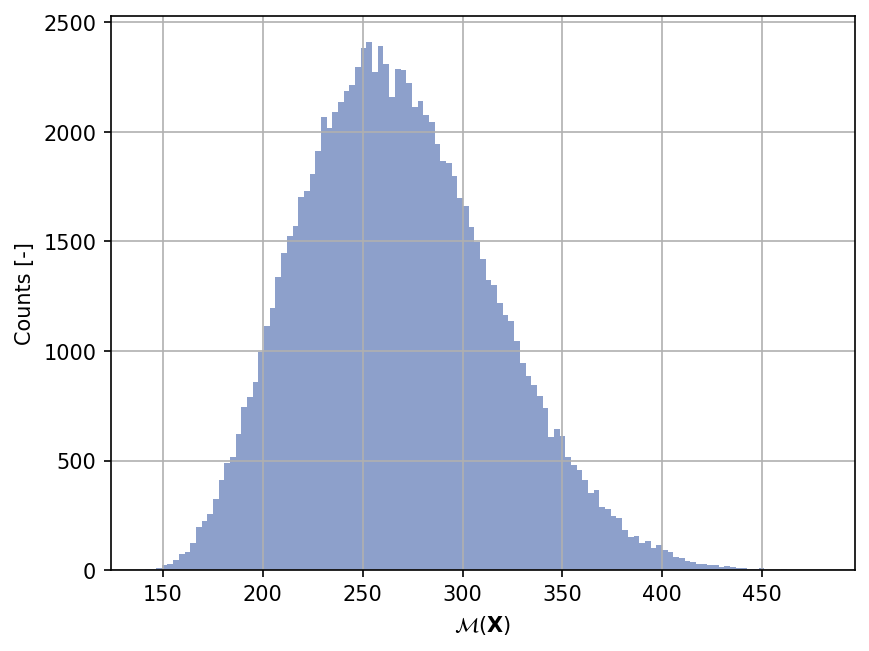

In [5]:
np.random.seed(42)
xx_test = my_testfun.prob_input.get_sample(100000)
yy_test = my_testfun(xx_test)

plt.hist(yy_test, bins="auto", color="#8da0cb");
plt.grid();
plt.ylabel("Counts [-]");
plt.xlabel("$\mathcal{M}(\mathbf{X})$");
plt.gcf().set_dpi(150);

### Moments estimation

Shown below is the convergence of a direct Monte-Carlo estimation of
the output mean and variance with increasing sample sizes.

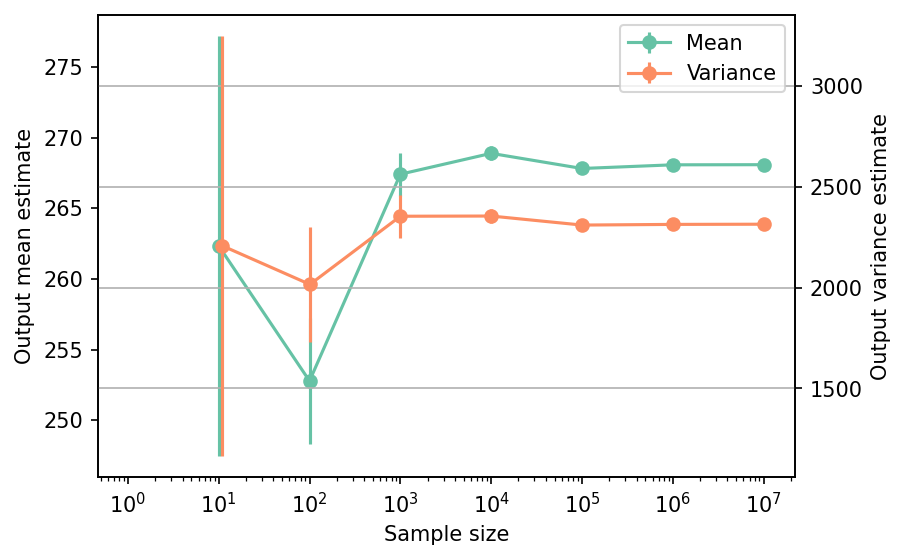

In [6]:
# --- Compute the mean and variance estimate
np.random.seed(42)
sample_sizes = np.array([1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7], dtype=int)
mean_estimates = np.empty(len(sample_sizes))
var_estimates = np.empty(len(sample_sizes))

for i, sample_size in enumerate(sample_sizes):
    xx_test = my_testfun.prob_input.get_sample(sample_size)
    yy_test = my_testfun(xx_test)
    mean_estimates[i] = np.mean(yy_test)
    var_estimates[i] = np.var(yy_test)

# --- Compute the error associated with the estimates
mean_estimates_errors = np.sqrt(var_estimates) / np.sqrt(np.array(sample_sizes))
var_estimates_errors = var_estimates * np.sqrt(2 / (np.array(sample_sizes) - 1))

# --- Do the plot
fig, ax_1 = plt.subplots(figsize=(6,4))

ax_1.errorbar(
    sample_sizes,
    mean_estimates,
    yerr=mean_estimates_errors,
    marker="o",
    color="#66c2a5",
    label="Mean",
)
ax_1.set_xlabel("Sample size")
ax_1.set_ylabel("Output mean estimate")
ax_1.set_xscale("log");
ax_2 = ax_1.twinx()
ax_2.errorbar(
    sample_sizes + 1,
    var_estimates,
    yerr=var_estimates_errors,
    marker="o",
    color="#fc8d62",
    label="Variance",
)
ax_2.set_ylabel("Output variance estimate")

# Add the two plots together to have a common legend
ln_1, labels_1 = ax_1.get_legend_handles_labels()
ln_2, labels_2 = ax_2.get_legend_handles_labels()
ax_2.legend(ln_1 + ln_2, labels_1 + labels_2, loc=0)

plt.grid()
fig.set_dpi(150)

The tabulated results for each sample size is shown below.

In [7]:
from tabulate import tabulate

# --- Compile data row-wise
outputs = []
for (
    sample_size,
    mean_estimate,
    mean_estimate_error,
    var_estimate,
    var_estimate_error,
) in zip(
    sample_sizes,
    mean_estimates,
    mean_estimates_errors,
    var_estimates,
    var_estimates_errors,
):
    outputs += [
        [
            sample_size,
            mean_estimate,
            mean_estimate_error,
            var_estimate,
            var_estimate_error,
            "Monte-Carlo",
        ],
    ]

header_names = [
    "Sample size",
    "Mean",
    "Mean error",
    "Variance",
    "Variance error",
    "Remark",
]

tabulate(
    outputs,
    headers=header_names,
    floatfmt=(".1e", ".4e", ".4e", ".4e", ".4e", "s"),
    tablefmt="html",
    stralign="center",
    numalign="center",
)

'<table>\n<thead>\n<tr><th style="text-align: center;"> Sample size </th><th style="text-align: center;">   Mean   </th><th style="text-align: center;"> Mean error </th><th style="text-align: center;"> Variance </th><th style="text-align: center;"> Variance error </th><th style="text-align: center;">  Remark   </th></tr>\n</thead>\n<tbody>\n<tr><td style="text-align: center;">   1.0e+01   </td><td style="text-align: center;">2.6234e+02</td><td style="text-align: center;"> 1.4853e+01 </td><td style="text-align: center;">2.2062e+03</td><td style="text-align: center;">   1.0400e+03   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+02   </td><td style="text-align: center;">2.5279e+02</td><td style="text-align: center;"> 4.4892e+00 </td><td style="text-align: center;">2.0153e+03</td><td style="text-align: center;">   2.8645e+02   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+03   </td><td style="text-align: center;">2.6741e+02</td><td style="text-align: center;"> 1.5339e+00 </td><td style="text-align: center;">2.3530e+03</td><td style="text-align: center;">   1.0528e+02   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+04   </td><td style="text-align: center;">2.6889e+02</td><td style="text-align: center;"> 4.8518e-01 </td><td style="text-align: center;">2.3540e+03</td><td style="text-align: center;">   3.3293e+01   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+05   </td><td style="text-align: center;">2.6782e+02</td><td style="text-align: center;"> 1.5196e-01 </td><td style="text-align: center;">2.3093e+03</td><td style="text-align: center;">   1.0328e+01   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+06   </td><td style="text-align: center;">2.6807e+02</td><td style="text-align: center;"> 4.8090e-02 </td><td style="text-align: center;">2.3126e+03</td><td style="text-align: center;">   3.2705e+00   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+07   </td><td style="text-align: center;">2.6808e+02</td><td style="text-align: center;"> 1.5210e-02 </td><td style="text-align: center;">2.3135e+03</td><td style="text-align: center;">   1.0347e+00   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n</tbody>\n</table>'

## References

```{bibliography}
:style: unsrtalpha
:filter: docname in docnames
```